# **PROBLEMA DE NEGOCIO ☣**


---




### Una entidad gubernamental responsable de la gestión de la salud en un país enfrenta el desafío de comprender y analizar la propagación del COVID-19 para tomar decisiones informadas y eficaces en la gestión de la pandemia. Como científico de datos, tu tarea es analizar los datos relacionados con el COVID-19 y presentar insights a través de visualizaciones que respondan a preguntas claves

## ▶ Configuración del ambiente ◀

In [1]:
import pandas as pd
import numpy as np
import requests # Solo para poder importar los datos
from io import StringIO # Solo para poder importar los datos

import warnings; warnings.filterwarnings("ignore") # Evita las alertas sin sentido de algunas librerías

## ▶ Obtención, Tratamiento y Análisis Exploratorio (EDA) ◀

### Cargando las bases de datos

In [2]:
# # Cargamos los datos
# df_covid = pd.read_csv(StringIO(requests.get("https://covid19.who.int/WHO-COVID-19-global-data.csv").text))
# df_population = pd.read_excel('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx', sheet_name=0, skiprows=16)
# df_population = df_population[df_population['Year'] == 2020] # Tomamos desde el 2020

In [3]:
# # Guardarlos en archivos locales
# df_covid.to_csv('covid.csv', index=False)
# df_population.to_csv('population.csv', index=False)

In [4]:
# Cargamos los datos
df_covid = pd.read_csv('covid.csv')
df_population = pd.read_csv('population.csv')

In [5]:
# 5 primeras filas de covid
df_covid.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50880 entries, 0 to 50879
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      50880 non-null  object 
 1   Country_code       49396 non-null  object 
 2   Country            49608 non-null  object 
 3   WHO_region         45792 non-null  object 
 4   New_cases          36622 non-null  float64
 5   Cumulative_cases   50880 non-null  int64  
 6   New_deaths         24216 non-null  float64
 7   Cumulative_deaths  50880 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.1+ MB


In [6]:
# Transformo las filas a sus respectivos formatos
df_covid['Date_reported'] = pd.to_datetime(df_covid['Date_reported'])
df_covid['Country_code'] = df_covid['Country_code'].astype('string')
df_covid['Country'] = df_covid['Country'].astype('string')
df_covid['WHO_region'] = df_covid['WHO_region'].astype('category')
df_covid['New_cases'] = pd.to_numeric(df_covid['New_cases'], errors='coerce')
df_covid['Cumulative_cases'] = pd.to_numeric(df_covid['Cumulative_cases'], errors='coerce')
df_covid['New_deaths'] = pd.to_numeric(df_covid['New_deaths'], errors='coerce')
df_covid['Cumulative_deaths'] = pd.to_numeric(df_covid['Cumulative_deaths'], errors='coerce')

In [7]:
# 5 primeras filas de population
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 65 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Index                                                                                           286 non-null    int64  
 1   Variant                                                                                         286 non-null    object 
 2   Region, subregion, country or area *                                                            286 non-null    object 
 3   Notes                                                                                           76 non-null     object 
 4   Location code                                                                                   286 non-null    int64  
 5   ISO3 Alpha-code

In [8]:
# Con f'' dentro del print podemos formatear el texto y pasarle variables dentro de {}, df_covid.shape nos da (filas, columnas)
print(f'¿Cuantas observaciones o filas tenemos? {df_covid.shape[0]}') # df_covid.shape[0] es el primer valor de shape (filas)
print(f'¿Cuantas variables o columnas tenemos? {df_covid.shape[1]}') # df_covid.shape[1] es el segundo valor de shape (columnas)

¿Cuantas observaciones o filas tenemos? 50880
¿Cuantas variables o columnas tenemos? 8


In [9]:
# Con f'' dentro del print podemos formatear el texto y pasarle variables dentro de {}, df_population.shape nos da (filas, columnas)
print(f'¿Cuantas observaciones o filas tenemos? {df_population.shape[0]}') # df_population.shape[0] es el primer valor de shape (filas)
print(f'¿Cuantas variables o columnas tenemos? {df_population.shape[1]}') # df_population.shape[1] es el segundo valor de shape (columnas)

¿Cuantas observaciones o filas tenemos? 286
¿Cuantas variables o columnas tenemos? 65


In [10]:
# Cuantas fechas observamos en el dataset
print(f'¿Cuantas fechas únicas tenemos? {df_covid["Date_reported"].nunique()}') # nunique() nos da la cantidad de valores únicos

¿Cuantas fechas únicas tenemos? 212


### Hacemos Limpieza de Datos

In [11]:
# Seleccionamos solo las columnas de df_population que nos interesan
df_population = df_population[['ISO2 Alpha-code',
                               'Total Population, as of 1 July (thousands)',
                               'Population Sex Ratio, as of 1 July (males per 100 females)',
                               'Population Density, as of 1 July (persons per square km)',
                               'Life Expectancy at Birth, both sexes (years)',
                               'Median Age, as of 1 July (years)',
                               'Infant Mortality Rate (infant deaths per 1,000 live births)',
                               'Net Migration Rate (per 1,000 population)',
                               'Under-Five Mortality (deaths under age 5 per 1,000 live births)'
                               ]]

In [12]:
# Renombramos las columnas
df_population.rename(columns={
    'ISO2 Alpha-code': 'Country_code',
    'Total Population, as of 1 July (thousands)': 'Total_Population',
    'Population Sex Ratio, as of 1 July (males per 100 females)': 'Sex_Ratio_Men',
    'Population Density, as of 1 July (persons per square km)': 'Population_Density',
    'Life Expectancy at Birth, both sexes (years)': 'Life_Expectancy',
    'Median Age, as of 1 July (years)': 'Median_Age',
    'Infant Mortality Rate (infant deaths per 1,000 live births)': 'Infant_Mortality',
    'Net Migration Rate (per 1,000 population)': 'Net_Migration',
    'Under-Five Mortality (deaths under age 5 per 1,000 live births)': 'Under_Five_Mortality'
}, inplace = True)

In [13]:
# Transformo las filas de df_ population a sus respectivos formatos
df_population['Country_code'] = df_population['Country_code'].astype('string')
df_population['Total_Population'] = pd.to_numeric(df_population['Total_Population'], errors='coerce')
df_population['Population_Density'] = pd.to_numeric(df_population['Population_Density'], errors='coerce')
df_population['Life_Expectancy'] = pd.to_numeric(df_population['Life_Expectancy'], errors='coerce')
df_population['Median_Age'] = pd.to_numeric(df_population['Median_Age'], errors='coerce')
df_population['Infant_Mortality'] = pd.to_numeric(df_population['Infant_Mortality'], errors='coerce')
df_population['Net_Migration'] = pd.to_numeric(df_population['Net_Migration'], errors='coerce')
df_population['Under_Five_Mortality'] = pd.to_numeric(df_population['Under_Five_Mortality'], errors='coerce')

In [14]:
# Analizamos los datos faltantes en las columnas que nos interesan en df_population
df_population['Total_Population'].isna().sum()

0

In [15]:
df_population['Country_code'].isna().sum()

50

In [16]:
# Observamos que son principalemnte regiones o subregiones las que no tienen código de país,
# No nos afecta, por tanto las eliminamos
df_population = df_population.dropna(subset=['Country_code'])

In [17]:
# Verificamos si hay valores faltantes en Country_code
df_covid['Country_code'].isna().sum()

1484

In [18]:
# Verificamos de que Country son los datos faltantes
df_covid[df_covid['Country_code'].isna()].Country.unique()

<StringArray>
[<NA>, 'Namibia']
Length: 2, dtype: string

In [19]:
# Agregamos el codigo de Namibia faltante
df_covid.loc[df_covid['Country'] == 'Namibia', 'Country_code'] = 'NA'

In [20]:
# Verificamos los <NA> en Country_code
df_covid[df_covid['Country_code'].isna()].Country.unique()

<StringArray>
[<NA>]
Length: 1, dtype: string

In [21]:
# Eliminamos las filas con valores faltantes en Country_code 
# No tenemos como saber de que pais se trata
df_covid = df_covid.dropna(subset=['Country_code'])

#### Unimos los conjuntos de datos

In [22]:
# Hacemos un merge de los datos de población con los de covid
data = df_covid.merge(df_population, how='left', left_on='Country_code', right_on='Country_code')
# Convertimos la población a número real, ya que viene en miles
data['Total_Population'] = data['Total_Population'] * 1000

#### Mundo

In [23]:
data.isna().sum()

Date_reported               0
Country_code                0
Country                     0
WHO_region               3816
New_cases               12998
Cumulative_cases            0
New_deaths              25399
Cumulative_deaths           0
Total_Population          424
Sex_Ratio_Men             424
Population_Density        424
Life_Expectancy           636
Median_Age                636
Infant_Mortality          636
Net_Migration             636
Under_Five_Mortality      636
dtype: int64

In [24]:
# Visto los resultados de datos faltantes, se decide seguir el análisis sin los datos de:
# 'New_cases', 'New_deaths' y 'WHO_region'. 
# De todas formas a 'New_cases', y 'New_deaths' los trataremos después.
data = data.drop(['WHO_region'], axis=1)

In [25]:
# filtramos los paises sin nombre ni codigo
data_filtered = data[data['Country_code'].isna() & data['Country'].isna()]
data_filtered.count()

Date_reported           0
Country_code            0
Country                 0
New_cases               0
Cumulative_cases        0
New_deaths              0
Cumulative_deaths       0
Total_Population        0
Sex_Ratio_Men           0
Population_Density      0
Life_Expectancy         0
Median_Age              0
Infant_Mortality        0
Net_Migration           0
Under_Five_Mortality    0
dtype: int64

In [26]:
# Los eliminamos, ya que no podemos identificarlos
data = data.drop(data_filtered.index, axis=0)

In [27]:
# Verificamos los datos faltantes que aun tenemos
data.isna().sum()

Date_reported               0
Country_code                0
Country                     0
New_cases               12998
Cumulative_cases            0
New_deaths              25399
Cumulative_deaths           0
Total_Population          424
Sex_Ratio_Men             424
Population_Density        424
Life_Expectancy           636
Median_Age                636
Infant_Mortality          636
Net_Migration             636
Under_Five_Mortality      636
dtype: int64

In [28]:
# Verificamos que Country tiene datos faltantes de Population
data[data['Total_Population'].isna()].Country.unique()

<StringArray>
['Namibia', 'Pitcairn']
Length: 2, dtype: string

In [29]:
# Obtenemos el dato faltante de poblacion de wikipedia y lo agregamos
data.loc[data['Country'] == 'Namibia', 'Total_Population'] = 2642000
data.loc[data['Country'] == 'Pitcairn', 'Total_Population'] = 63

In [30]:
# Verificamos los datos faltantes que aun tenemos
data.isna().sum()

Date_reported               0
Country_code                0
Country                     0
New_cases               12998
Cumulative_cases            0
New_deaths              25399
Cumulative_deaths           0
Total_Population            0
Sex_Ratio_Men             424
Population_Density        424
Life_Expectancy           636
Median_Age                636
Infant_Mortality          636
Net_Migration             636
Under_Five_Mortality      636
dtype: int64

In [31]:
# Agregamos las columnas New_cases y New_deaths como diferencia entre los casos y muertes acumulados
# El primer valor será el el Cumulative_cases y Cumulative_deaths a la fecha
data['New_cases'] = data.groupby('Country')['Cumulative_cases'].diff().fillna(data['Cumulative_cases'])
data['New_deaths'] = data.groupby('Country')['Cumulative_deaths'].diff().fillna(data['Cumulative_deaths'])

In [32]:
# Verificamos los datos faltantes que aun tenemos
data.isna().sum()

Date_reported             0
Country_code              0
Country                   0
New_cases                 0
Cumulative_cases          0
New_deaths                0
Cumulative_deaths         0
Total_Population          0
Sex_Ratio_Men           424
Population_Density      424
Life_Expectancy         636
Median_Age              636
Infant_Mortality        636
Net_Migration           636
Under_Five_Mortality    636
dtype: int64

In [33]:
# Analizamos los datos faltantes en population density
data[data['Population_Density'].isna()].Country.unique()

<StringArray>
['Namibia', 'Pitcairn']
Length: 2, dtype: string

In [34]:
# Analizamos los datos faltantes en life expectancy
data[data['Life_Expectancy'].isna()].Country.unique()

<StringArray>
['Holy See', 'Namibia', 'Pitcairn']
Length: 3, dtype: string

In [35]:
# Vemos que se repiten 'Holy See', 'Namibia', 'Pitcairn'. Se toma la decisión de eliminarlos
data = data.drop(data[data['Country'] == 'Holy See'].index, axis=0)
data = data.drop(data[data['Country'] == 'Namibia'].index, axis=0)
data = data.drop(data[data['Country'] == 'Pitcairn'].index, axis=0)

In [36]:
# Verificamos los datos faltantes que aun tenemos
data.isna().sum()

Date_reported           0
Country_code            0
Country                 0
New_cases               0
Cumulative_cases        0
New_deaths              0
Cumulative_deaths       0
Total_Population        0
Sex_Ratio_Men           0
Population_Density      0
Life_Expectancy         0
Median_Age              0
Infant_Mortality        0
Net_Migration           0
Under_Five_Mortality    0
dtype: int64

In [37]:
# Seguimos teniendo valores negativos en New_cases y New_deaths.
# Se decide continuar y resolver el problema más adelante.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
New_cases,48972.0,1.580894e+04,2.418653e+05,-65079.000,0.000,107.000,2.061000e+03,4.047548e+07
Cumulative_cases,48972.0,1.657707e+06,7.304095e+06,0.000,4281.250,44224.000,5.063682e+05,1.034368e+08
New_deaths,48972.0,1.432703e+02,8.787055e+02,-3432.000,0.000,0.000,2.100000e+01,4.768700e+04
Cumulative_deaths,48972.0,1.944988e+04,7.942058e+04,0.000,32.000,558.000,6.875000e+03,1.165780e+06
Total_Population,48972.0,3.379181e+07,1.361487e+08,1827.000,394921.000,5456681.000,2.152263e+07,1.424930e+09
Population_Density,48972.0,3.462608e+02,1.738360e+03,0.137,39.070,94.284,2.382520e+02,2.477987e+04
Life_Expectancy,48972.0,7.275189e+01,7.263440e+00,52.777,67.924,74.009,7.834300e+01,8.653800e+01
Median_Age,48972.0,3.049011e+01,9.412260e+00,14.444,21.723,30.564,3.862800e+01,5.445700e+01
Infant_Mortality,48972.0,1.802268e+01,1.744294e+01,1.201,5.482,11.282,2.505000e+01,7.465800e+01
Net_Migration,48972.0,-1.038381e+00,9.032013e+00,-57.697,-1.441,-0.026,1.390000e+00,2.128400e+01


In [38]:
# Creamos una columna con la tasa de mortalidad por cada 100 mil habitantes
data['lethality_rate_per_100m'] = (data['Cumulative_deaths'] / data['Total_Population']) * 100000

In [39]:
# Creamos una columna con la tasa de letalidad de nuevas muertes por cada 100 mil habitantes
data['New_lethality_rate_per_100m'] = (data['New_deaths'] / data['Total_Population']) * 100000

In [40]:
# Creamos una columna con la tasa de incidencia de nuevos casos
data['New_incidence_rate_per_1000'] = (data['New_cases'] / data['Total_Population']) * 100000

In [41]:
# Creamos una columna con la tasa de incidencia
data['Incidence_rate'] = (data['Cumulative_cases'] / data['Total_Population']) * 100

In [42]:
# Creamos una columna con el ratio de letalidad por casos acumulados
data['Case_lethality_ratio'] = (data['Cumulative_deaths'] / data['Cumulative_cases']) * 100

In [43]:
# Creamos una columna con el ratio de letalidad de casos nuevos
data['New_case_lethality_ratio'] = (data['New_deaths'] / data['New_cases']) * 100

In [44]:
# Vemos si hay datos duplicados
data.duplicated().sum()

0

In [45]:
# Vemos si hay datos nulos
data.isna().sum()

Date_reported                      0
Country_code                       0
Country                            0
New_cases                          0
Cumulative_cases                   0
New_deaths                         0
Cumulative_deaths                  0
Total_Population                   0
Sex_Ratio_Men                      0
Population_Density                 0
Life_Expectancy                    0
Median_Age                         0
Infant_Mortality                   0
Net_Migration                      0
Under_Five_Mortality               0
lethality_rate_per_100m            0
New_lethality_rate_per_100m        0
New_incidence_rate_per_1000        0
Incidence_rate                     0
Case_lethality_ratio            3947
New_case_lethality_ratio       12421
dtype: int64

In [46]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
New_cases,48972.0,1.580894e+04,2.418653e+05,-6.507900e+04,0.000000,1.070000e+02,2.061000e+03,4.047548e+07
Cumulative_cases,48972.0,1.657707e+06,7.304095e+06,0.000000e+00,4281.250000,4.422400e+04,5.063682e+05,1.034368e+08
New_deaths,48972.0,1.432703e+02,8.787055e+02,-3.432000e+03,0.000000,0.000000e+00,2.100000e+01,4.768700e+04
Cumulative_deaths,48972.0,1.944988e+04,7.942058e+04,0.000000e+00,32.000000,5.580000e+02,6.875000e+03,1.165780e+06
Total_Population,48972.0,3.379181e+07,1.361487e+08,1.827000e+03,394921.000000,5.456681e+06,2.152263e+07,1.424930e+09
Population_Density,48972.0,3.462608e+02,1.738360e+03,1.370000e-01,39.070000,9.428400e+01,2.382520e+02,2.477987e+04
Life_Expectancy,48972.0,7.275189e+01,7.263440e+00,5.277700e+01,67.924000,7.400900e+01,7.834300e+01,8.653800e+01
Median_Age,48972.0,3.049011e+01,9.412260e+00,1.444400e+01,21.723000,3.056400e+01,3.862800e+01,5.445700e+01
Infant_Mortality,48972.0,1.802268e+01,1.744294e+01,1.201000e+00,5.482000,1.128200e+01,2.505000e+01,7.465800e+01
Net_Migration,48972.0,-1.038381e+00,9.032013e+00,-5.769700e+01,-1.441000,-2.600000e-02,1.390000e+00,2.128400e+01


In [47]:
# Se decide transformar los infinitos a valor inmediato inferior, o en su defecto, inmediato superior
data = data.replace([np.inf, -np.inf], np.nan).fillna(method='bfill').fillna(method='ffill')

In [48]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
New_cases,48972.0,1.580894e+04,2.418653e+05,-65079.000000,0.000000,1.070000e+02,2.061000e+03,4.047548e+07
Cumulative_cases,48972.0,1.657707e+06,7.304095e+06,0.000000,4281.250000,4.422400e+04,5.063682e+05,1.034368e+08
New_deaths,48972.0,1.432703e+02,8.787055e+02,-3432.000000,0.000000,0.000000e+00,2.100000e+01,4.768700e+04
Cumulative_deaths,48972.0,1.944988e+04,7.942058e+04,0.000000,32.000000,5.580000e+02,6.875000e+03,1.165780e+06
Total_Population,48972.0,3.379181e+07,1.361487e+08,1827.000000,394921.000000,5.456681e+06,2.152263e+07,1.424930e+09
Population_Density,48972.0,3.462608e+02,1.738360e+03,0.137000,39.070000,9.428400e+01,2.382520e+02,2.477987e+04
Life_Expectancy,48972.0,7.275189e+01,7.263440e+00,52.777000,67.924000,7.400900e+01,7.834300e+01,8.653800e+01
Median_Age,48972.0,3.049011e+01,9.412260e+00,14.444000,21.723000,3.056400e+01,3.862800e+01,5.445700e+01
Infant_Mortality,48972.0,1.802268e+01,1.744294e+01,1.201000,5.482000,1.128200e+01,2.505000e+01,7.465800e+01
Net_Migration,48972.0,-1.038381e+00,9.032013e+00,-57.697000,-1.441000,-2.600000e-02,1.390000e+00,2.128400e+01


In [49]:
# Renombrar los paises segun el formato de geopandas
data['Country'] = data['Country'].replace({'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom'})
data['Country'] = data['Country'].replace({'Iran (Islamic Republic of)': 'Iran'})
data['Country'] = data['Country'].replace({'Venezuela (Bolivarian Republic of)': 'Venezuela'})
data['Country'] = data['Country'].replace({'Bolivia (Plurinational State of)': 'Bolivia'})
data['Country'] = data['Country'].replace({'Russian Federation': 'Russia'})
data['Country'] = data['Country'].replace({'Syrian Arab Republic': 'Syria'})
data['Country'] = data['Country'].replace({'Viet Nam': 'Vietnam'})
data['Country'] = data['Country'].replace({'Republic of Korea': 'South Korea'})
data['Country'] = data['Country'].replace({'Republic of Moldova': 'Moldova'})
data['Country'] = data['Country'].replace({'Netherlands (Kingdom of the)': 'Netherlands'})
data['Country'] = data['Country'].replace({'Türkiye': 'Turkey'})

Ya tenemos los datos sin duplicados, sin nulos, concatenados, transformados y con ratios creados ✅

In [50]:
# Guardamos el dataset limpio
data.to_csv('covid_clean.csv', index=False)

---

### Segunda Parte

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import geopandas as gpd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings; warnings.filterwarnings("ignore") # Evita las alertas sin sentido de algunas librerías

In [52]:
# Cargo el dataset limpio
df_covid_limpio = pd.read_csv('covid_clean.csv')

In [53]:
# Transformo las filas a sus respectivos formatos (los decimales ya están en el formato correcto)
df_covid_limpio['Country_code'] = df_covid_limpio['Country_code'].astype('string')
df_covid_limpio['Date_reported'] = pd.to_datetime(df_covid_limpio['Date_reported'])
df_covid_limpio['Country'] = df_covid_limpio['Country'].astype('string')
df_covid_limpio['New_cases'] = df_covid_limpio['New_cases'].astype('int')
df_covid_limpio['Cumulative_cases'] = df_covid_limpio['Cumulative_cases'].astype('int')
df_covid_limpio['New_deaths'] = df_covid_limpio['New_deaths'].astype('int')
df_covid_limpio['Cumulative_deaths'] = df_covid_limpio['Cumulative_deaths'].astype('int')
df_covid_limpio['Total_Population'] = df_covid_limpio['Total_Population'].astype('int')

In [54]:
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48972 entries, 0 to 48971
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date_reported                48972 non-null  datetime64[ns]
 1   Country_code                 48972 non-null  string        
 2   Country                      48972 non-null  string        
 3   New_cases                    48972 non-null  int32         
 4   Cumulative_cases             48972 non-null  int32         
 5   New_deaths                   48972 non-null  int32         
 6   Cumulative_deaths            48972 non-null  int32         
 7   Total_Population             48972 non-null  int32         
 8   Sex_Ratio_Men                48972 non-null  float64       
 9   Population_Density           48972 non-null  float64       
 10  Life_Expectancy              48972 non-null  float64       
 11  Median_Age                   48972 non-nu

#### Nueva Zelanda

In [55]:
# Elegimos Nueva Zelanda con 'Country_code' == 'NZ' y eliminamos todos los demas con dropna()
df_nz = df_covid_limpio.loc[df_covid_limpio['Country_code'] == 'NZ']

In [56]:
# Resto del Mundo sin Nueva Zelanda
df_rest_of_the_world = df_covid_limpio.loc[df_covid_limpio['Country_code'] != 'NZ']

## **▶ Preguntas  ⁉ ◀**

### **1. ¿Cómo ha evolucionado el Covid-19 en el país en comparación con el impacto observado a nivel global?**

Casos Acumulados

In [57]:
total_por_pais = df_covid_limpio.groupby('Country').Cumulative_cases.max().sort_values(ascending = False)

In [58]:
top_10_paises = total_por_pais[:10]

In [59]:
total_por_pais.drop(top_10_paises.index, inplace = True)

In [60]:
otros = total_por_pais.sum()

In [61]:
top_10_paises['Otros'] = otros

In [62]:
nz = total_por_pais['New Zealand']
top_10_paises['New_Zealand'] = nz

Progreso de Casos

In [63]:
total_por_pais = df_covid_limpio.groupby('Country').Cumulative_cases.max().sort_values(ascending = False)

In [64]:
top_5_paises = total_por_pais[0:5]
# Agrego a Nuevo Zelanda
top_5_paises['New Zealand'] = total_por_pais['New Zealand']

In [65]:
df_covid_limpio_reset = df_covid_limpio.reset_index(drop = True)

In [66]:
df_top_5 = df_covid_limpio_reset[df_covid_limpio_reset['Country'].isin(top_5_paises.index)]

In [67]:
total_acumulado_top_5 = df_top_5.pivot(index='Country', columns='Date_reported', values='Cumulative_cases').fillna(0)

In [68]:
total_acumulado_top_5

Date_reported,2020-01-05,2020-01-12,2020-01-19,2020-01-26,2020-02-02,2020-02-09,2020-02-16,2020-02-23,2020-03-01,2020-03-08,...,2023-11-19,2023-11-26,2023-12-03,2023-12-10,2023-12-17,2023-12-24,2023-12-31,2024-01-07,2024-01-14,2024-01-21
Country,,,,,,,,,,,,,,,,,,,,,
China,1,45,125,1985,14411,37251,68584,77042,79968,80859,...,99320035,99320425,99320845,99321242,99321637,99322142,99322727,99323756,99325108,99326423
France,0,0,0,3,6,12,12,16,16,16,...,38997490,38997490,38997490,38997490,38997490,38997490,38997490,38997490,38997490,38997490
Germany,1,1,1,2,11,20,25,31,170,1075,...,38437756,38437756,38437756,38437756,38437756,38437756,38437756,38437756,38437756,38437756
India,0,0,0,0,2,7,7,7,7,39,...,45001575,45001764,45002179,45003055,45004816,45008620,45013172,45018134,45021758,45023751
New Zealand,0,0,0,0,0,0,0,0,1,5,...,2410372,2416777,2422392,2427916,2434052,2440375,2440375,2452236,2457969,2464757
United States of America,0,0,0,7,9,20,24,40,73,464,...,103436829,103436829,103436829,103436829,103436829,103436829,103436829,103436829,103436829,103436829


In [69]:
# Crea una figura con 1 fila y 2 columnas
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=('Casos Acumulados - Top 10 Países', 'Evolución de Casos - Top 5 Países'), 
                    specs=[[{'type': 'domain'}, {'type': 'xy'}]])

# Agrega el gráfico de donuts
fig.add_trace(
    go.Pie(labels=top_10_paises.index, values=top_10_paises, name='Top 10 Países'),
    row=1, col=1
)

# Agrega el gráfico de líneas
for pais in top_5_paises.index:
    fig.add_trace(
        go.Scatter(x=total_acumulado_top_5.columns, y=total_acumulado_top_5.loc[pais], mode='lines', name=pais),
        row=1, col=2
    )

# Añade texto descriptivo al gráfico de donuts
fig.add_annotation(
    text="Nueva Zelanda se encuentra muy alejada de los paises mas afectados con solo un 0.3 % de los casos mundiales.",
    xref="paper", yref="paper",
    x=-0.05, y=-0.1, showarrow=False
)

# Ajusta el tamaño de la figura
fig.update_layout(height=600, width=1024)

# Muestra el gráfico
fig.show()

### **2. ¿Cuál ha sido la evolución de los nuevos casos diarios reportados de Covid-19 en el país a lo largo del tiempo?**

In [70]:
# Grafica de linea de casos nuevos para nz a lo largo del tiempo
fig = go.Figure()

# Añadir traza para Australia
fig.add_trace(go.Scatter(x=df_rest_of_the_world.loc[df_rest_of_the_world['Country'] == 'Australia', 'Date_reported'], 
                         y=df_rest_of_the_world.loc[df_rest_of_the_world['Country'] == 'Australia', 'New_cases'], 
                         mode='lines', 
                         name='Australia'))

# Añadir traza para Nueva Zelanda
fig.add_trace(go.Scatter(x=df_nz['Date_reported'], 
                         y=df_nz['New_cases'], 
                         mode='lines', 
                         name='Nueva Zelanda'))

# Añadir texto descriptivo
fig.add_annotation(
    text="Vemos el llamado 'Efecto Contagio' entre Nueva Zelanda y Australia.",
    xref="paper", yref="paper",
    x=0.5, y=-0.15, showarrow=False
)

fig.update_layout(title='Casos nuevos en Nueva Zelanda comparado con Australia', 
                  xaxis_title='Fecha', 
                  yaxis_title='Casos nuevos',
                  height=600, width=1024)
fig.show()

### **3. ¿Cuál es la evolución del índice de letalidad del Covid-19 en el país, comparado con los países con los índices históricos más elevados?**

In [71]:
# Obtiene los países con los índices de letalidad más elevados
top_countries = df_rest_of_the_world.groupby('Country')['lethality_rate_per_100m'].max().sort_values(ascending=False).head(5).index

# Calcula la media de lethality_rate_per_100m por fecha
mean_lethality_rate = df_covid_limpio.groupby('Date_reported')['lethality_rate_per_100m'].mean()

# Crea una figura
fig = go.Figure()

# Agrega la traza para Nueva Zelanda
fig.add_trace(go.Scatter(x=df_nz['Date_reported'], y=df_nz['lethality_rate_per_100m'], mode='lines', name='Nueva Zelanda'))
# Agrega la traza para la media
fig.add_trace(go.Scatter(x=mean_lethality_rate.index, y=mean_lethality_rate, mode='lines', name='Media', line=dict(dash='dash')))

# Agrega las trazas para los países con los índices de letalidad más elevados
for country in top_countries:
    df_country = df_rest_of_the_world[df_rest_of_the_world['Country'] == country]
    fig.add_trace(go.Scatter(x=df_country['Date_reported'], y=df_country['lethality_rate_per_100m'], mode='lines', name=country))

# Añade texto descriptivo
fig.add_annotation(
    text="En terminos de letalidad vemos como Nueva Zelanda se encuentra bastante por debajo del promedio, aunque acercándose.",
    xref="paper", yref="paper",
    x=0.5, y=-0.25, showarrow=False
)

# Configura el título y los ejes
fig.update_layout(title='Evolución del índice de letalidad del Covid-19 (paises mas afectados)', xaxis_title='Fecha', yaxis_title='Índice de letalidad por 100m')

# Muestra el gráfico
fig.show()

In [72]:
# Obtiene los países con los índices de letalidad más elevados
top_countries = df_rest_of_the_world.groupby('Country')['lethality_rate_per_100m'].min().sort_values(ascending=False).head(5).index

# Calcula la media de lethality_rate_per_100m por fecha
mean_lethality_rate = df_covid_limpio.groupby('Date_reported')['lethality_rate_per_100m'].mean()

# Crea una figura
fig = go.Figure()

# Agrega la traza para Nueva Zelanda
fig.add_trace(go.Scatter(x=df_nz['Date_reported'], y=df_nz['lethality_rate_per_100m'], mode='lines', name='Nueva Zelanda'))
# Agrega la traza para la media
fig.add_trace(go.Scatter(x=mean_lethality_rate.index, y=mean_lethality_rate, mode='lines', name='Media', line=dict(dash='dash')))

# Agrega las trazas para los países con los índices de letalidad más elevados
for country in top_countries:
    df_country = df_rest_of_the_world[df_rest_of_the_world['Country'] == country]
    fig.add_trace(go.Scatter(x=df_country['Date_reported'], y=df_country['lethality_rate_per_100m'], mode='lines', name=country))

# Añade texto descriptivo
fig.add_annotation(
    text="En terminos de letalidad encontramos a Nueva Zelanda entre los paìses menos afectados.",
    xref="paper", yref="paper",
    x=0.5, y=-0.25, showarrow=False
)

# Configura el título y los ejes
fig.update_layout(title='Evolución del índice de letalidad del Covid-19 (paises menos afectados)', xaxis_title='Fecha', yaxis_title='Índice de letalidad por 100m')

# Muestra el gráfico
fig.show()

### **4. Desde una perspectiva demográfica, ¿cuáles son las características que tienen un mayor impacto en el índice de letalidad de un país?**

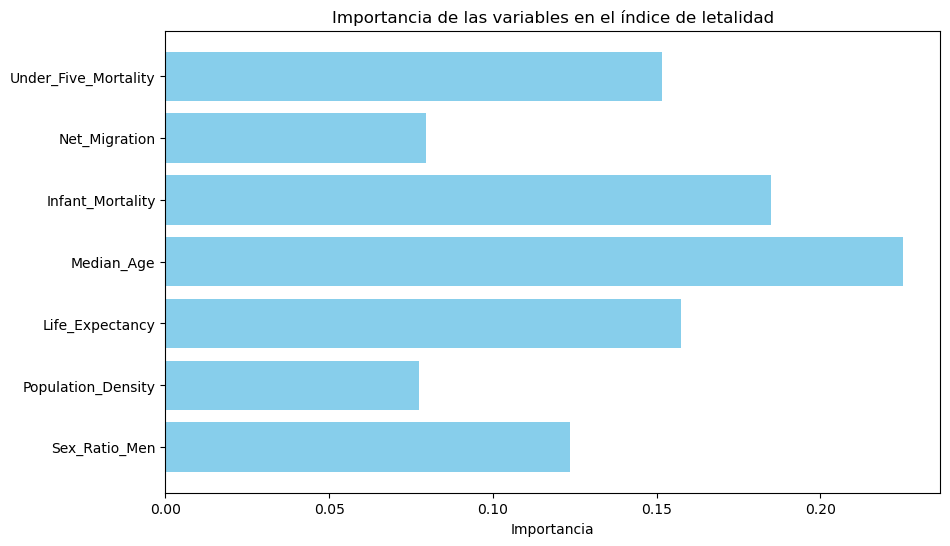

In [73]:
# utilizo un extratrees para calcular la importancia de las variables
from sklearn.ensemble import ExtraTreesRegressor

# Creo un modelo
model = ExtraTreesRegressor(random_state=1)

# Lista de regresores
regresors = ['Sex_Ratio_Men', 
            'Population_Density', 
            'Life_Expectancy', 
            'Median_Age', 
            'Infant_Mortality', 
            'Net_Migration', 
            'Under_Five_Mortality']

# Entreno el modelo
model.fit(df_covid_limpio[regresors], 
                           df_covid_limpio['lethality_rate_per_100m'])

# Guardo la importancia de cada variable
importance_df = model.feature_importances_

# Creo un gráfico de barras con la importancia de cada variable
plt.figure(figsize=(10, 6))
plt.barh(regresors, 
         importance_df, color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de las variables en el índice de letalidad')

plt.show()

### **5. ¿Existe otro insight que puedas proporcionar?**

#### Creamos una funcion para separar los datos mayores a cierto percentil

In [74]:
# Función para filtrar percentiles sin el 1% superior y darle valor del máximo + 1
def filtrar_percentiles(df, columna, percentil):
    aux = df.copy()
    maximo = aux[columna].quantile(percentil)
    std_error = np.std(aux[columna])
    aux[columna] = aux[columna].apply(lambda x: maximo + std_error if x > maximo else x)
    return aux

#### Creamos una funcion para graficar los datos

In [75]:
def mapa(df, columna, fecha, titulo):
    # Crear un mapa de colores personalizado
    cmap = mcolors.LinearSegmentedColormap.from_list("n",['green','yellow','red'])

    # Cargar el conjunto de datos del mundo incorporado que viene con GeoPandas
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Filtrar df_covid por la fecha deseada
    date = fecha  # Cambia esto a la fecha que quieras
    df_date = df[df['Date_reported'] == date]

    # Fusionar los datos de población con el GeoDataFrame del mundo
    world = world.merge(df_date, left_on='name', right_on='Country', how='left')

    # Crear el mapa
    _, ax = plt.subplots(1, 1, figsize=(20, 10))
    world = filtrar_percentiles(world, columna, 0.99)
    world.plot(column=columna, cmap=cmap, legend=True, ax=ax, missing_kwds={'color': 'lightgrey'})

    # Poner nombres a los ejes y título
    ax.set_title(f'({fecha}) {titulo}', fontsize=25)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Mostrar el mapa
    plt.show()

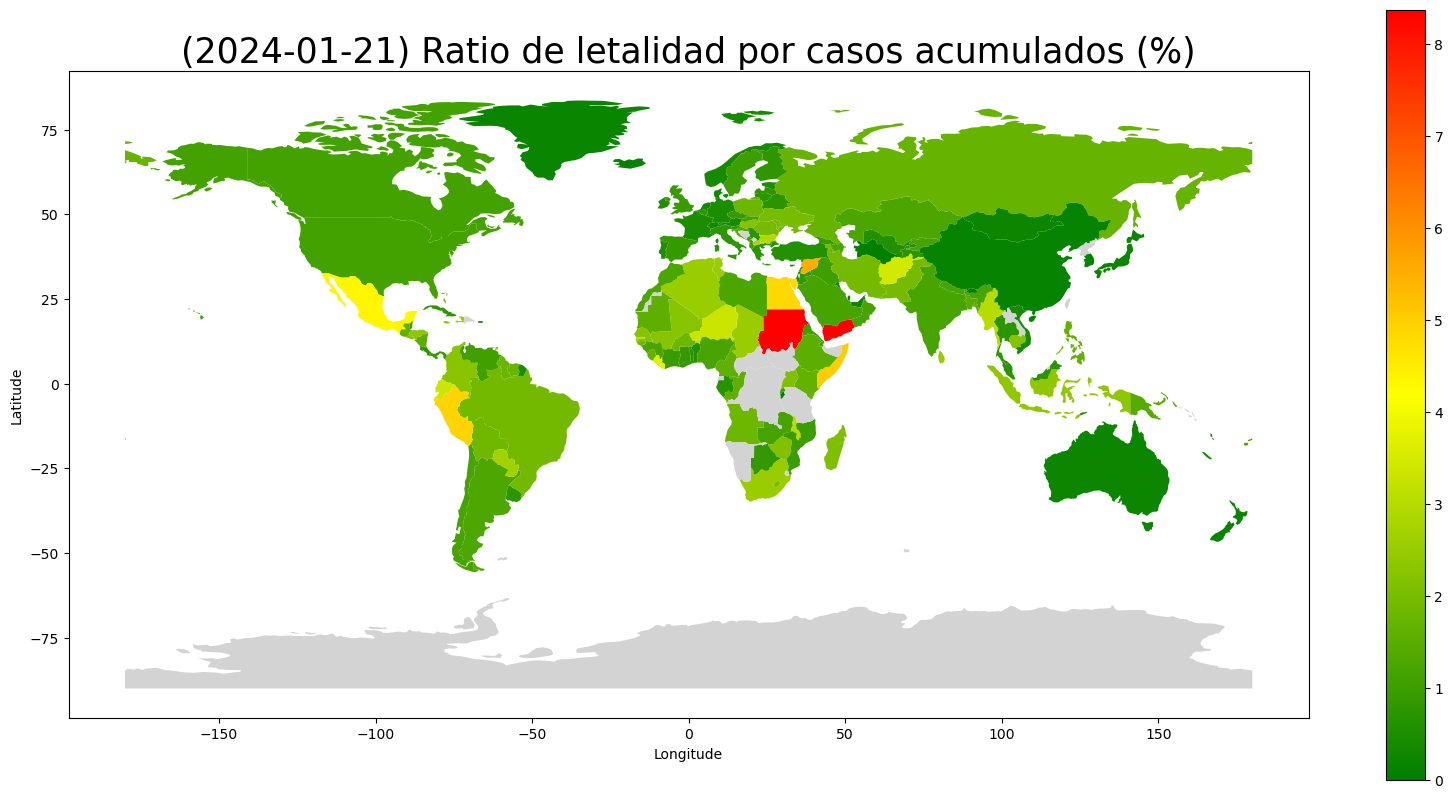

In [76]:
mapa(df_covid_limpio, 'Case_lethality_ratio', '2024-01-21', 'Ratio de letalidad por casos acumulados (%)')

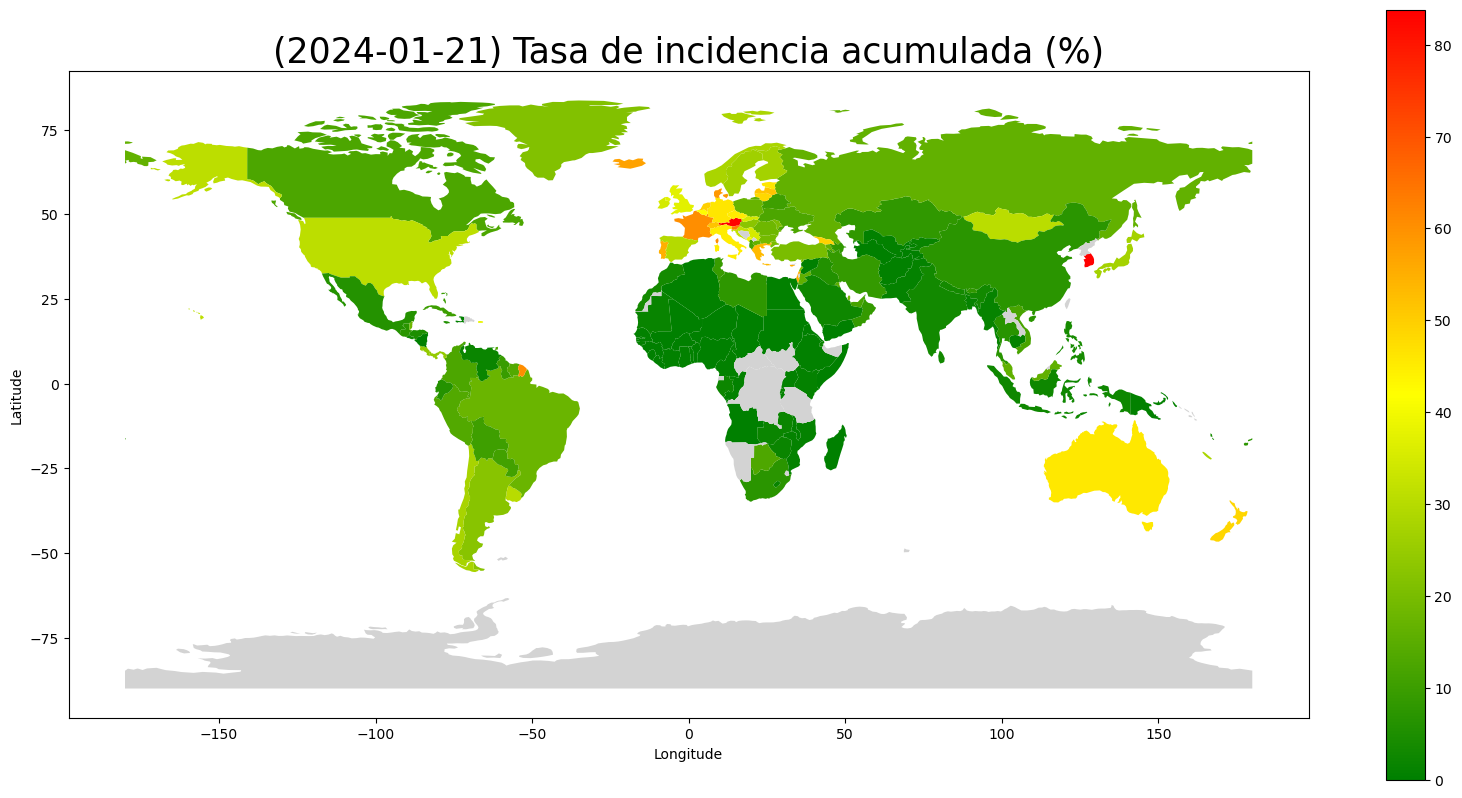

In [77]:
mapa(df_covid_limpio, 'Incidence_rate', '2024-01-21', 'Tasa de incidencia acumulada (%)')

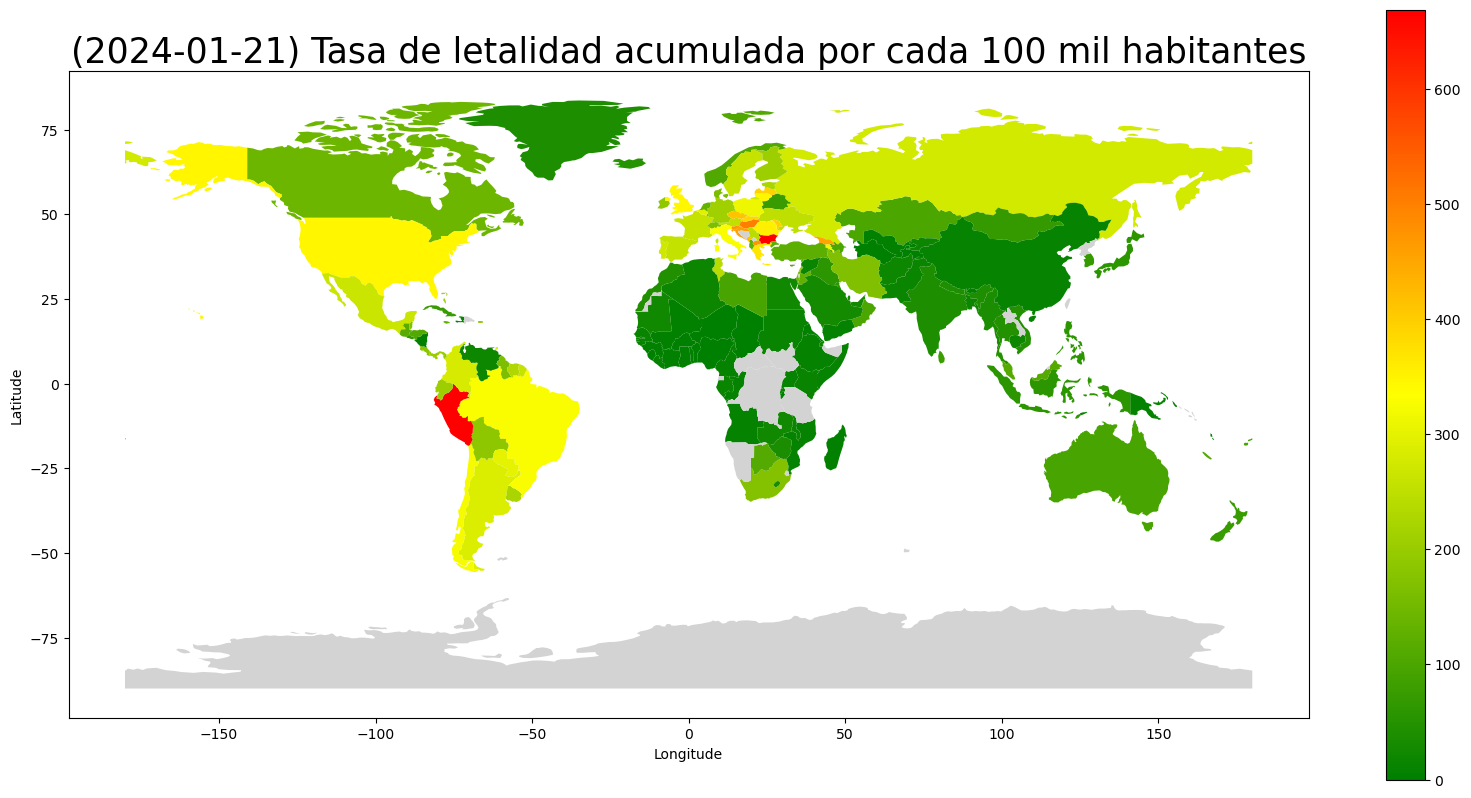

In [78]:
mapa(df_covid_limpio, 'lethality_rate_per_100m', '2024-01-21', 'Tasa de letalidad acumulada por cada 100 mil habitantes')

#### Paises Latinoamericanos

In [79]:
# Lista de Contry_code de países de América Latina
latin_american_countries = ['AR', 'BO', 'BR', 'CL', 'CO', 'CR', 'CU', 'DO', 'EC', 'SV', 'GT', 'HN', 'MX', 'NI', 'PA', 'PY', 'PE', 'PR', 'UY', 'VE']

In [80]:
# Filtramos por paises de latinoamerica
df_latin_american = df_covid_limpio[df_covid_limpio['Country_code'].isin(latin_american_countries)]

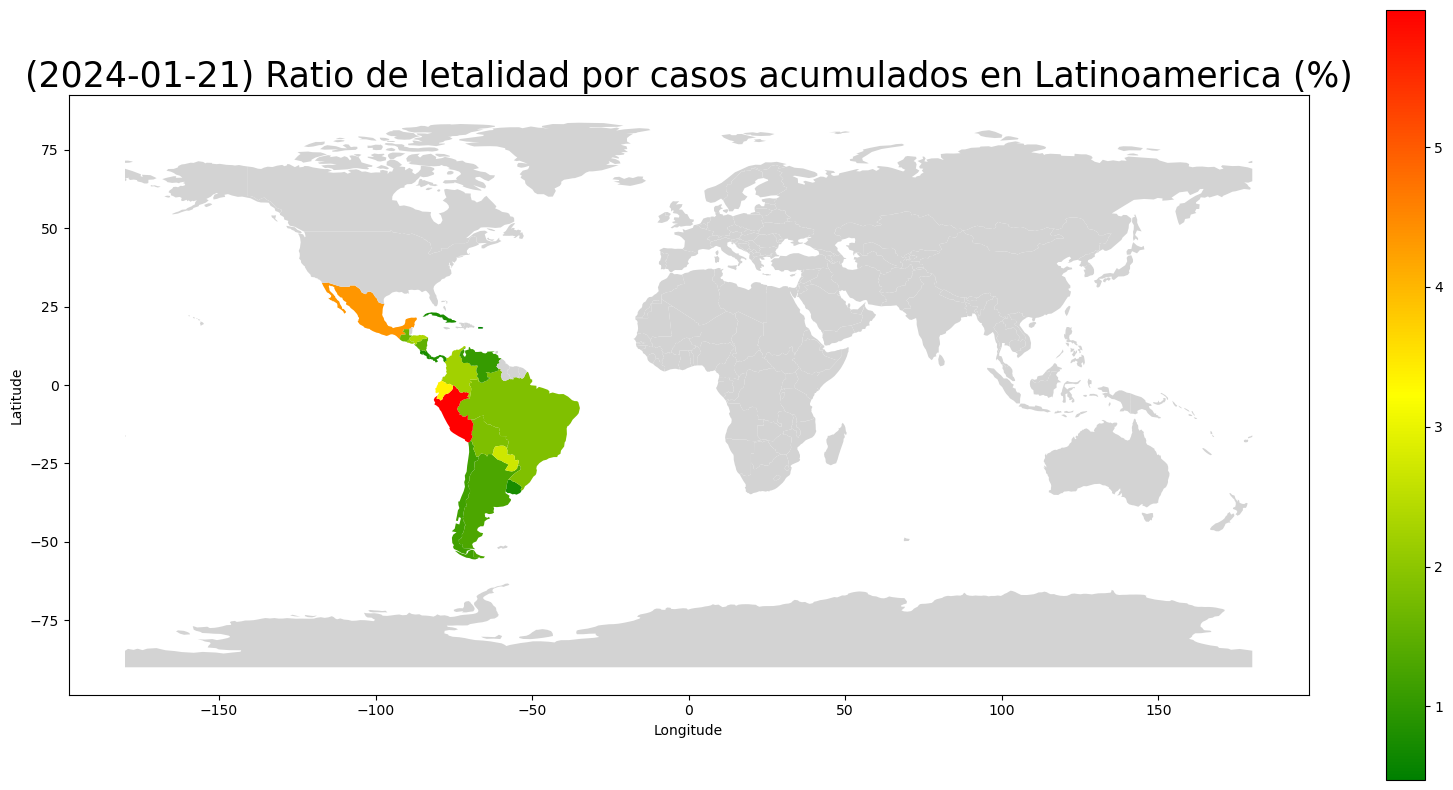

In [81]:
mapa(df_latin_american, 'Case_lethality_ratio', '2024-01-21', 'Ratio de letalidad por casos acumulados en Latinoamerica (%)')

#### Extra: Clusterizamos los Países en funcion de la edad media de la población, la tasa de mortalidad infantil, expectativa de vida al nacer y el ratio de letalidad por casos acumulados

In [82]:
# Filtramos los datos por pais para el último día disponible

# Encuentra la fecha más reciente para cada país
idx = df_covid_limpio.groupby('Country')['Date_reported'].idxmax()

# Usa esos índices para seleccionar las filas correspondientes del DataFrame original
df_latest = df_covid_limpio.loc[idx]

In [83]:
# Primero determinamos el número de clusters óptimo usando el método del codo y el método de la silueta
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm


def plot_cluster(df, random_state=1):
    # Elbow Method
    def elbow_method(data, max_clusters):
        distortions = []
        for i in tqdm(range(1, max_clusters + 1)):
            kmeans = KMeans(n_clusters=i, random_state=random_state, n_init=10)
            kmeans.fit(data)
            distortions.append(kmeans.inertia_)
        return distortions

    max_clusters = 10
    distortions = elbow_method(df, max_clusters)

    # Finding the optimal number of clusters using silhouette score
    silhouette_scores = []
    for i in tqdm(range(2, max_clusters + 1)):
        kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
        labels = kmeans.fit_predict(df)
        silhouette_avg = silhouette_score(df, labels)
        silhouette_scores.append(silhouette_avg)

    # Create a figure with two subplots vertically
    _, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 12))

    # Plot the elbow method on the first subplot
    ax1.plot(range(1, max_clusters + 1), distortions, marker='o')
    ax1.set_title('Elbow Method')
    ax1.set_xlabel('Number of Clusters')
    ax1.set_ylabel('Distortion')

    # Plot silhouette scores on the second subplot
    ax2.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    ax2.set_title('Silhouette Score')
    ax2.set_xlabel('Number of Clusters')
    ax2.set_ylabel('Silhouette Score')

    # Adjust spaces between subplots
    plt.tight_layout()
    plt.show()

100%|██████████| 9/9 [00:04<00:00,  1.88it/s]


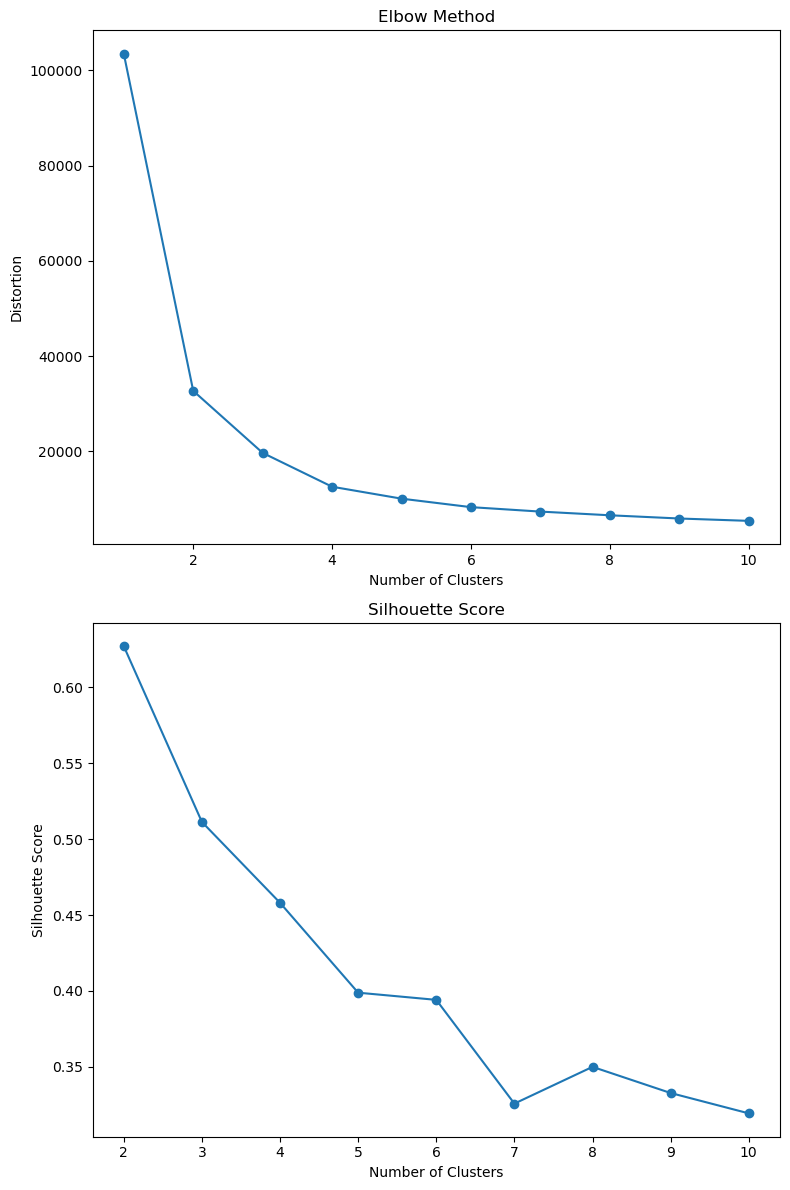

In [92]:
# Usaremos la edad media de la población, la tasa de mortalidad infantil y el ratio de letalidad por casos acumulados
plot_cluster(df_latest[['Median_Age', 'Infant_Mortality', 'Case_lethality_ratio', 'Life_Expectancy']])

In [93]:
# Creamos los clusters con 5 grupos
def generate_clusters(df, k=5):

    # Apply K-Means clustering
    name = 'K-MEANS'
    kmeans = KMeans(n_clusters=k, random_state=1)
    labels = kmeans.fit_predict(df)

    # Genera el gráfico
    fig = go.Figure(data=go.Scatter(
        x=df['Median_Age'],
        y=df['Case_lethality_ratio'],
        mode='markers',
        marker=dict(
            size=8,
            color=labels,  # establece el color a los labels de kmeans
            colorscale='Viridis',  # elige una escala de colores
        ),
        text=df_latest['Country'],  # muestra el nombre del país cuando pasas el cursor sobre un punto
        hoverinfo='text'  # muestra solo el texto especificado en 'text' cuando pasas el cursor sobre un punto
    ))

    # Añade títulos y etiquetas
    fig.update_layout(
        title=f'Clustering with {name}',
        xaxis_title='Median_Age',
        yaxis_title='Case_lethality_ratio',
    )

    # Muestra el gráfico
    fig.show()

    # Create a series with cluster numbers
    cluster_series = pd.Series(labels, name='Clusters', index=df.index)

    return cluster_series

In [94]:
# Generams los clusters
clusters = generate_clusters(df_latest[['Median_Age', 'Case_lethality_ratio']])

In [95]:
df_latest['Cluster'] = clusters

In [96]:
clusters.value_counts()

2    50
0    47
1    46
3    45
4    43
Name: Clusters, dtype: int64

In [97]:
df_latest[df_latest['Country_code'] == 'NZ']['Cluster'].values[0]

1

In [98]:
# Nombre de paises dentro del cluster de Nueva Zelanda
df_latest[df_latest['Cluster'] == df_latest[df_latest['Country_code'] == 'NZ']['Cluster'].values[0]]['Country'].unique()

<StringArray>
[                              'Albania',
                              'Anguilla',
                   'Antigua and Barbuda',
                             'Australia',
                              'Barbados',
                               'Belarus',
     'Bonaire, Saint Eustatius and Saba',
                'British Virgin Islands',
                                'Canada',
                        'Cayman Islands',
                                 'Chile',
                                 'China',
                               'Curaçao',
                                'Cyprus',
 "Democratic People's Republic of Korea",
           'Falkland Islands (Malvinas)',
                         'Faroe Islands',
                               'Georgia',
                              'Guernsey',
                               'Iceland',
                               'Ireland',
                                'Jersey',
                                'Kuwait',
                    

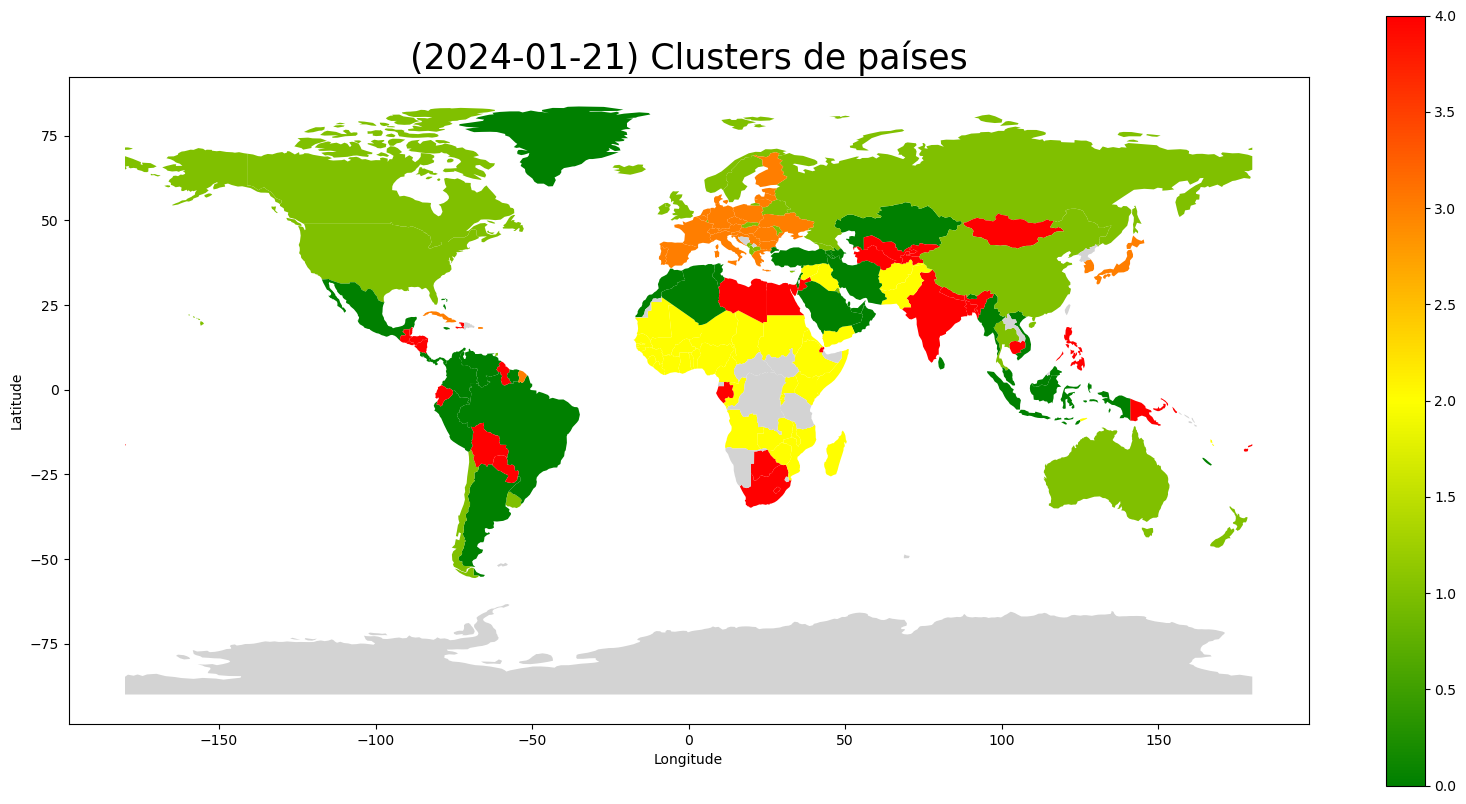

In [99]:
mapa(df_latest, 'Cluster', '2024-01-21', 'Clusters de países')